In [1]:
from manopth.manolayer import ManoLayer
import numpy as np
from manopth.demo import display_hand
import torch

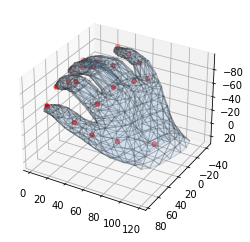

In [23]:
batch_size = 1

# number of principal componenets for pose space
ncomps = 46

mano_layer = ManoLayer(
    mano_root="mano/models",
    use_pca=True,
    ncomps=ncomps,
    flat_hand_mean=False
)

pose = torch.tensor(
    [
        10.0, 10.0, 10.0,
        0.25, 0.5, 1.0,
        0.0, 0.0, 1.0,
        0.0, 0.0, 0.5,
        0.25, 0.5, 1.0,
        0.0, 0.0, 1.0,
        0.0, 0.0, 0.7,
        0.25, 0.5, 1.5,
        1.0, 0.0, 1.0,
        0.0, 0.0, 1.5,
        0.25, 0.5, 1.0,
        0.0, 0.0, 1.0,
        0.0, 0.0, 0.7,
        -0.5, 0.5, 1.5,
        0.0, 0.5, 0.0,
        0.0, 1.0, -0.5,
    ]
)
pose = pose.unsqueeze(dim=0)
shape = torch.rand(batch_size, 10)

hand_verts, hand_joints = mano_layer(pose, shape)
display_hand(
    {"verts": hand_verts, "joints": hand_joints},
    mano_faces=mano_layer.th_faces
)


In [16]:
pose = torch.tensor(
    [
        10.0, 10.0, 10.0,
        0.25, 0.5, 1.0,
        0.0, 0.0, 1.0,
        0.0, 0.0, 0.5,
        0.25, 0.5, 1.0,
        0.0, 0.0, 1.0,
        0.0, 0.0, 0.7,
        0.25, 0.5, 1.5,
        1.0, 0.0, 1.0,
        0.0, 0.0, 1.5,
        0.25, 0.5, 1.0,
        0.0, 0.0, 1.0,
        0.0, 0.0, 0.7,
        -0.5, 0.5, 1.5,
        0.0, 0.5, 0.0,
        0.0, 1.0, -0.5,
    ]
)

array([10. , 10. , 10. ,  0.2,  0.5,  1. ,  0. ,  0. ,  1. ,  0. ,  0. ,
        0.5,  0.2,  0.5,  1. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0.7,  0.2,
        0.5,  1.5,  1. ,  0. ,  1. ,  0. ,  0. ,  1.5,  0.2,  0.5,  1. ,
        0. ,  0. ,  1. ,  0. ,  0. ,  0.7, -0.5,  0.5,  1.5,  0. ,  0.5,
        0. ,  0. ,  1. , -0.5], dtype=float32)